<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/principal_component_analysis_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis in sklearn

Principal Component Analysis (PCA) is a simple yet popular and useful linear transformation technique that is used in numerous applications, such as stock market predictions, the  analysis of gene expression data, and many more. In this tutorial, we will see that PCA is not just a "black box", and we are going to unravel its internals in 3 basic steps.

### Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RAND=123

# import some data to play with
iris = datasets.load_iris()
X = iris.data

y = iris.target


X=np.hstack((X,10*np.random.random((y.shape[0], 3))))
X[:,6]=X[:,6]*X[:,0] +5*np.random.random((y.shape[0]))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


Baseline accuracy = 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
nb_model = KNeighborsClassifier(n_neighbors=3, p=1)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_base=accuracy_score(y_test,y_pred)
print("Baseline accuracy = ", scores_base)

Baseline accuracy =  0.8947368421052632


##  PCA in scikit-learn

In [4]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)
sklearn_pca.explained_variance_ratio_

array([0.43309883, 0.16211521])

In [5]:
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("PCA features accuracy = ", scores_base)

PCA features accuracy =  0.8421052631578947


Notice the code below has .75 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 75% of the variance is retained.



In [8]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(0.75)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)
sklearn_pca.explained_variance_ratio_

array([0.43309883, 0.16211521, 0.14790908, 0.13434802])

In [9]:
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("PCA features accuracy = ", scores_base)

PCA features accuracy =  0.868421052631579


## Loading scikit-learn's MNIST Hand-Written Dataset

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits()
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [21]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X.shape)

(1797, 64)


In [17]:
nb_model = KNeighborsClassifier(n_neighbors=3, p=1)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_base=accuracy_score(y_test,y_pred)
print("Digits Baseline accuracy = ", scores_base)

Baseline accuracy =  0.9644444444444444


In [28]:

sklearn_pca = sklearnPCA(n_components=27)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)
print("Variances =",sklearn_pca.explained_variance_ratio_)
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("Digits PCA features accuracy = ", scores_base)

Variances = [0.119561   0.09466752 0.08474954 0.0647293  0.04997728 0.04124574
 0.0402975  0.03526709 0.03248071 0.03062158 0.02862378 0.02565699
 0.02287402 0.02267857 0.02175523 0.01898683 0.01823929 0.01646688
 0.016188   0.01447744 0.01376538 0.01285984 0.01150689 0.01078459
 0.00941319 0.00909708 0.00858804]
Digits PCA features accuracy =  0.9755555555555555


In [24]:
scores=[]
for i in range(1,64):
  sklearn_pca = sklearnPCA(n_components=i)
  sklearn_pca.fit(X_train)
  X_train_pca = sklearn_pca.transform(X_train)
  X_test_pca  = sklearn_pca.transform(X_test)
  nb_model.fit(X_train_pca, y_train)
  y_pred = nb_model.predict(X_test_pca)
  scores_base=accuracy_score(y_test,y_pred)
  scores.append(scores_base)

plt.plot(range(1,64), scores)

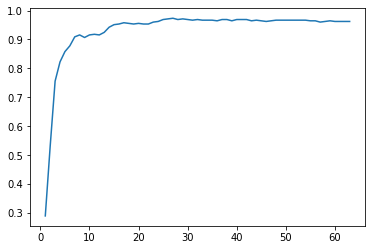